In [1]:
# in use of base:3.11.5 (no torch) #

import pandas as pd
import akshare as ak

In [2]:
# 读取股票代码的Excel文件
stock_codes_df = pd.read_excel('.\\Data\\codelist.xlsx')
stock_codes_df['股票代码'] = stock_codes_df['股票代码'].apply(lambda x:str(x).zfill(6))

# 假设Excel文件中股票代码所在的列名为 'stock_code'
stock_codes = stock_codes_df['股票代码'].tolist()

# 读取预存储的新闻数据
base = pd.read_excel('.\\Data\\merged_data_base.xlsx')
base['关键词'] = base['关键词'].apply(lambda x:str(x).zfill(6))

In [3]:
# 创建一个空的DataFrame用于存储所有股票的新闻数据
all_stock_news_df = pd.DataFrame()

# 循环遍历股票代码列表
for code in stock_codes:
    # 获取当前股票代码的新闻数据
    stock_news_df = ak.stock_news_em(symbol=code)
    
    # 如果获取到的数据不为空，则将其添加到主DataFrame中
    if not stock_news_df.empty:
        all_stock_news_df = pd.concat([all_stock_news_df, stock_news_df], ignore_index=True)

In [4]:
# 合并两个 DataFrame
merged_df = pd.concat([all_stock_news_df, base])

# 去除重复的行
merged_df = merged_df.drop_duplicates()

sorted_merge = merged_df.sort_values('发布时间')

# 重置索引
sorted_merge = sorted_merge.reset_index(drop=True)

sorted_merge['关键词'] = sorted_merge['关键词'].apply(lambda x:str(x).zfill(6))

# 将 DataFrame 保存到 CSV 文件中
sorted_merge.to_excel('.\\Data\\merged_data_base.xlsx', index=False)

In [5]:
sorted_merge

,关键词,新闻标题,新闻内容,发布时间,文章来源,新闻链接
0,000959,中科飞测近90亿市值限售股解禁，股东浮盈约47亿元,解禁数量超过1亿股的公司共11家，前三分别为电气风电（688660.SH）、首钢股份（000...,2024-05-20 08:34:49,界面新闻,http://finance.eastmoney.com/a/202405203080861...
1,000959,首钢股份（000959.SZ）5月21日解禁上市4.94亿股,2024年5月20日，首钢股份（000959.SZ）发布了关于部分限售股份解除限售上市流通的...,2024-05-20 09:35:04,界面新闻,http://finance.eastmoney.com/a/202405203081155...
2,601212,美国通胀符合预期，黄金价格或将开启下一轮涨势，有色金属ETF159871大涨3.13%,成分股兴业银锡(000426)上涨10.01%，白银有色601212上涨9.91%，四川黄金...,2024-05-20 11:03:04,界面新闻,http://stock.eastmoney.com/a/20240520308130612...
3,000559,今日60只个股跨越牛熊分界线,到目前为止，今日有60只A股价格突破了年线，其中乖离率较大的个股有电工合金、江天化学、金瑞矿...,2024-05-20 11:57:42,证券时报网,http://stock.eastmoney.com/a/20240520308133269...
4,601212,避险需求急速升温，黄金价格再创新高，有色金属ETF(512400大涨超4%,跟踪指数成分股兴业银锡(000426)上涨10.01%，白银有色601212上涨9.91%，...,2024-05-20 14:02:11,界面新闻,http://finance.eastmoney.com/a/202405203081421...
...,...,...,...,...,...,...
227042,601155,浦东项目遭弃购后 金茂90亿押注虹口,2016年，新城控股以总价37亿元竞得上海虹口区凉城新村街道073-06号地块，楼面价达到7...,2025-02-21 00:22:30,国际金融报,http://finance.eastmoney.com/a/202502213325198...
227043,600109,21深度｜刘成接任中信建投董事长！ 知情人士称其工作作风严谨扎实 “中信系”高管密集换防中信...,2011年12月，张佑君调回中信集团，王常青则担起中信建投董事长之责。 在王常青出任董事长的...,2025-02-21 00:28:20,21世纪经济报道,http://finance.eastmoney.com/a/202502213325201...
227044,000598,Netflix宣布2028年前投资10亿美元在墨西哥制作电影,Netflix（奈飞）首席执行官泰德·萨兰多斯2月20日在墨西哥城宣布，Netflix将在2...,2025-02-21 00:30:52,财联社,http://finance.eastmoney.com/a/202502213325202...
227045,600398,量子科技新成果不断涌现 上市公司积极布局,中国电子商务专家服务中心副主任郭涛在接受《证券日报》记者采访时表示：“在全球众多科技企业和科...,2025-02-21 00:39:28,证券日报,http://finance.eastmoney.com/a/202502213325205...


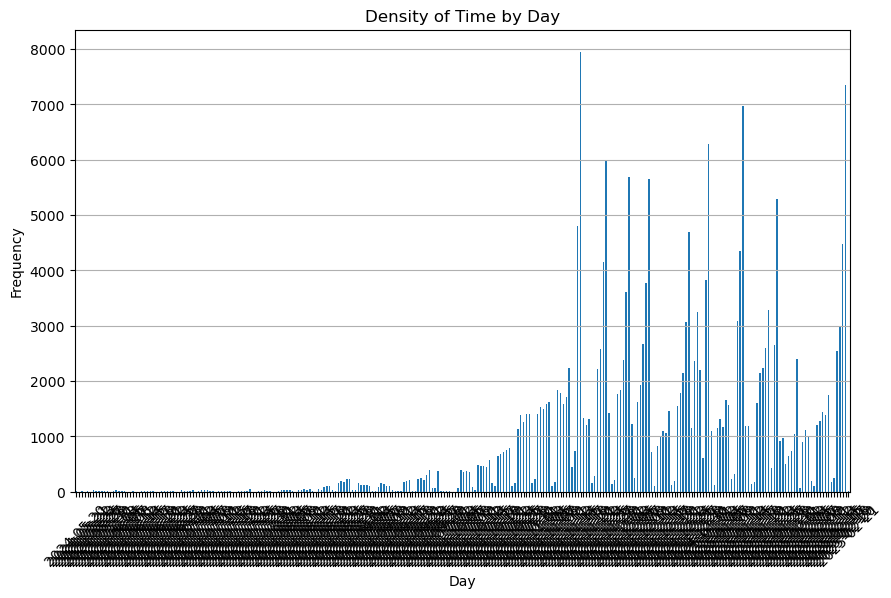

In [6]:
from datetime import datetime
import matplotlib.pyplot as plt

sorted_merge_1 = pd.DataFrame()

# 将时间字符串转换为datetime对象
sorted_merge_1['发布时间'] = pd.to_datetime(sorted_merge['发布时间'])

# 直接在'time_id'列上提取日期并统计每天的频率
daily_counts = sorted_merge_1['发布时间'].dt.date.value_counts().sort_index()

# 绘制柱形图
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar')
plt.title('Density of Time by Day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [7]:
# 找到最大值对应的日期
max_date = daily_counts.idxmax()
max_count = daily_counts.max()

print(f"最大值对应的日期是: {max_date}, 当天的计数是: {max_count}")

最大值对应的日期是: 2024-11-19, 当天的计数是: 7953
